In [1]:
# Create Latitude and Longitude Combinations

# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy


In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

busselton au
qaanaaq gl
dikson ru
rikitea pf
puerto ayora ec
castro cl
dikson ru
mahdasht ir
inongo cd
itarema br
zholymbet kz
albany au
kazachinskoye ru
tuktoyaktuk ca
santa luzia br
atuona pf
touros br
harper lr
homer us
busselton au
hermanus za
saskylakh ru
ushuaia ar
mataura pf
carnarvon au
goderich sl
avarua ck
mataura pf
san quintin mx
haines junction ca
lengshuitan cn
ribeira grande pt
souillac mu
coelho neto br
upernavik gl
nishihara jp
den helder nl
bredasdorp za
faanui pf
cockburn town tc
mataura pf
taksimo ru
vaini to
tsihombe mg
cherskiy ru
geraldton au
saltangara fo
borovoy ru
atuona pf
saint-philippe re
hamilton bm
fairview ca
vaitupu wf
manga br
mezen ru
aykhal ru
busselton au
mayo ca
charleston us
gobabis na
rikitea pf
rikitea pf
narsaq gl
busselton au
mys shmidta ru
soyo ao
vestmannaeyjar is
saint-philippe re
yellowknife ca
busselton au
cape town za
busselton au
tiksi ru
puerto ayora ec
nikolskoye ru
bluff nz
pevek ru
del rio us
punta arenas cl
cape town za
tambul sd
y

beloye ua
pacific grove us
cayce us
saint-philippe re
guiglo ci
san quintin mx
kenora ca
puerto ayora ec
busselton au
mataura pf
baturaja id
urdzhar kz
pevek ru
halalo wf
nizwa om
amderma ru
puerto ayora ec
rikitea pf
chuy uy
slupca pl
westport nz
hobart au
aykhal ru
mys shmidta ru
pochutla mx
asau tv
mys shmidta ru
ponta delgada pt
castro cl
ijaki ki
kapaa us
dezful ir
teahupoo pf
puerto ayora ec
illoqqortoormiut gl
gorno-chuyskiy ru
geraldton au
hithadhoo mv
saleaula ws
namibe ao
koplik al
ushuaia ar
rikitea pf
nikolskoye ru
grand river south east mu
smithfield us
avera pf
belmonte br
satitoa ws
hilo us
albany au
hobart au
avarua ck
bluff nz
port elizabeth za
swellendam za
taolanaro mg
treinta y tres uy
rikitea pf
daan cn
moose factory ca
kodiak us
busselton au
illoqqortoormiut gl
sao filipe cv
tuktoyaktuk ca
inhuma br
ushuaia ar
parabel ru
constantine dz
lazaro cardenas mx
rikitea pf
sorvag fo
hobart au
husavik is
mataura pf
oksfjord no
salalah om
astana kz
harrisonville us
nome us


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
#print(city_url)

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | busselton
Processing Record 2 of Set 13 | qaanaaq
Processing Record 3 of Set 13 | dikson
Processing Record 4 of Set 13 | rikitea
Processing Record 5 of Set 13 | puerto ayora
Processing Record 6 of Set 13 | castro
Processing Record 7 of Set 13 | mahdasht
Processing Record 8 of Set 13 | inongo
Processing Record 9 of Set 13 | itarema
Processing Record 10 of Set 13 | zholymbet
Processing Record 11 of Set 13 | albany
Processing Record 12 of Set 13 | kazachinskoye
Processing Record 13 of Set 13 | tuktoyaktuk
Processing Record 14 of Set 13 | santa luzia
Processing Record 15 of Set 13 | atuona
Processing Record 16 of Set 13 | touros
Processing Record 17 of Set 13 | harper
Processing Record 18 of Set 13 | homer
Processing Record 19 of Set 13 | hermanus
Processing Record 20 of Set 13 | saskylakh
Processing Record 21 of Set 13 | ushuaia
Processing Record 22 of Set 13 | mataura
Processing Record 23 of Set 13 | carnarvon
Processing Record 24 of Set 13 | goderich
Proc

Processing Record 35 of Set 16 | margate
Processing Record 36 of Set 16 | bandarbeyla
Processing Record 37 of Set 16 | jatni
City not found. Skipping...
Processing Record 38 of Set 16 | khatanga
Processing Record 39 of Set 16 | narrabri
Processing Record 40 of Set 16 | pisco
Processing Record 41 of Set 16 | lebu
Processing Record 42 of Set 16 | zaraza
Processing Record 43 of Set 16 | road town
Processing Record 44 of Set 16 | ishim
Processing Record 45 of Set 16 | tandil
Processing Record 46 of Set 16 | mizan teferi
Processing Record 47 of Set 16 | asyut
Processing Record 48 of Set 16 | saleaula
City not found. Skipping...
Processing Record 49 of Set 16 | sulangan
Processing Record 50 of Set 16 | ust-kuyga
Processing Record 1 of Set 17 | lavrentiya
Processing Record 2 of Set 17 | fort nelson
Processing Record 3 of Set 17 | antofagasta
Processing Record 4 of Set 17 | kaoma
Processing Record 5 of Set 17 | mahenge
Processing Record 6 of Set 17 | akdepe
Processing Record 7 of Set 17 | barb

Processing Record 18 of Set 20 | kenora
Processing Record 19 of Set 20 | baturaja
Processing Record 20 of Set 20 | urdzhar
City not found. Skipping...
Processing Record 21 of Set 20 | halalo
City not found. Skipping...
Processing Record 22 of Set 20 | nizwa
Processing Record 23 of Set 20 | amderma
City not found. Skipping...
Processing Record 24 of Set 20 | slupca
Processing Record 25 of Set 20 | westport
Processing Record 26 of Set 20 | asau
Processing Record 27 of Set 20 | ponta delgada
Processing Record 28 of Set 20 | ijaki
City not found. Skipping...
Processing Record 29 of Set 20 | dezful
Processing Record 30 of Set 20 | teahupoo
Processing Record 31 of Set 20 | gorno-chuyskiy
City not found. Skipping...
Processing Record 32 of Set 20 | namibe
Processing Record 33 of Set 20 | koplik
Processing Record 34 of Set 20 | smithfield
Processing Record 35 of Set 20 | avera
Processing Record 36 of Set 20 | belmonte
Processing Record 37 of Set 20 | satitoa
City not found. Skipping...
Process

Processing Record 4 of Set 24 | sijunjung
Processing Record 5 of Set 24 | batagay
Processing Record 6 of Set 24 | garner
Processing Record 7 of Set 24 | taquari
Processing Record 8 of Set 24 | plaster rock
Processing Record 9 of Set 24 | gari
Processing Record 10 of Set 24 | port moresby
Processing Record 11 of Set 24 | portland
Processing Record 12 of Set 24 | sisimiut
Processing Record 13 of Set 24 | ust-tsilma
Processing Record 14 of Set 24 | aranos
Processing Record 15 of Set 24 | ransang
Processing Record 16 of Set 24 | labuhan
Processing Record 17 of Set 24 | moerai
Processing Record 18 of Set 24 | enumclaw
Processing Record 19 of Set 24 | columbus
Processing Record 20 of Set 24 | tura
Processing Record 21 of Set 24 | salto
Processing Record 22 of Set 24 | mareeba
Processing Record 23 of Set 24 | prince rupert
Processing Record 24 of Set 24 | yar-sale
Processing Record 25 of Set 24 | flin flon
Processing Record 26 of Set 24 | marcona
City not found. Skipping...
Processing Record 

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,56.05,64,89,13.18,AU,2021-05-26 01:46:19
1,Qaanaaq,77.4840,-69.3632,29.34,72,12,6.31,GL,2021-05-26 01:46:20
2,Dikson,73.5069,80.5464,23.90,92,39,8.75,RU,2021-05-26 01:45:01
3,Rikitea,-23.1203,-134.9692,77.68,79,56,16.60,PF,2021-05-26 01:46:20
4,Puerto Ayora,-0.7393,-90.3518,74.55,91,13,5.01,EC,2021-05-26 01:46:20
5,Castro,-24.7911,-50.0119,49.69,52,29,1.32,BR,2021-05-26 01:46:21
6,Mahdasht,35.7299,50.8111,64.62,87,90,33.38,IR,2021-05-26 01:46:21
7,Inongo,-1.9500,18.2667,71.89,84,97,1.99,CD,2021-05-26 01:46:22
8,Itarema,-2.9248,-39.9167,76.77,82,87,9.95,BR,2021-05-26 01:46:22
9,Zholymbet,51.7433,71.7122,81.48,27,0,3.89,KZ,2021-05-26 01:46:23


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2021-05-26 01:46:19,-33.6500,115.3333,56.05,64,89,13.18
1,Qaanaaq,GL,2021-05-26 01:46:20,77.4840,-69.3632,29.34,72,12,6.31
2,Dikson,RU,2021-05-26 01:45:01,73.5069,80.5464,23.90,92,39,8.75
3,Rikitea,PF,2021-05-26 01:46:20,-23.1203,-134.9692,77.68,79,56,16.60
4,Puerto Ayora,EC,2021-05-26 01:46:20,-0.7393,-90.3518,74.55,91,13,5.01


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

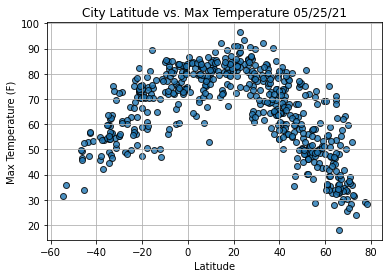

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

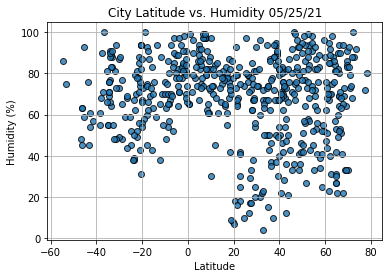

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

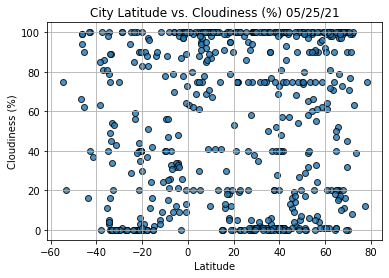

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

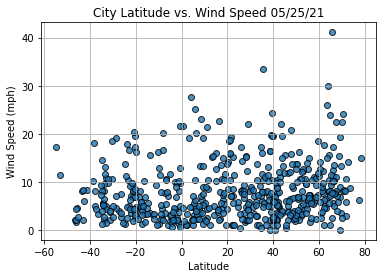

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [27]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Qaanaaq,GL,2021-05-26 01:46:20,77.4840,-69.3632,29.34,72,12,6.31
2,Dikson,RU,2021-05-26 01:45:01,73.5069,80.5464,23.90,92,39,8.75
6,Mahdasht,IR,2021-05-26 01:46:21,35.7299,50.8111,64.62,87,90,33.38
9,Zholymbet,KZ,2021-05-26 01:46:23,51.7433,71.7122,81.48,27,0,3.89
10,Albany,US,2021-05-26 01:42:14,42.6001,-73.9662,74.05,68,100,4.79


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

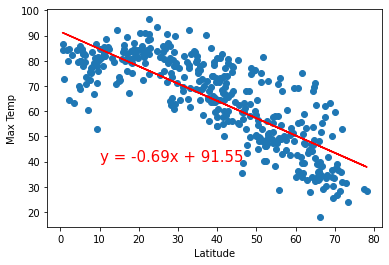

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

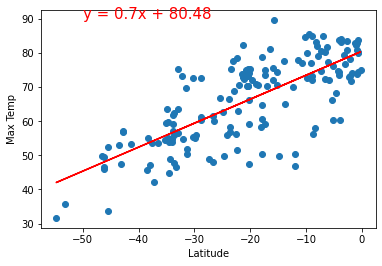

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

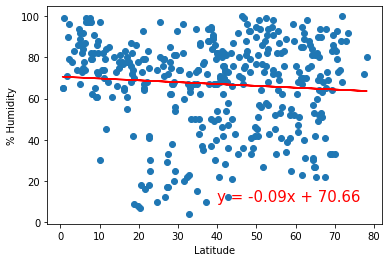

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

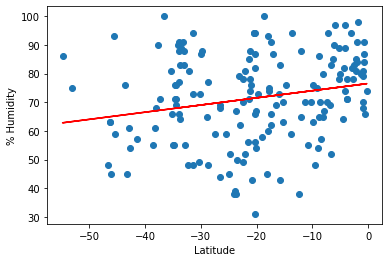

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

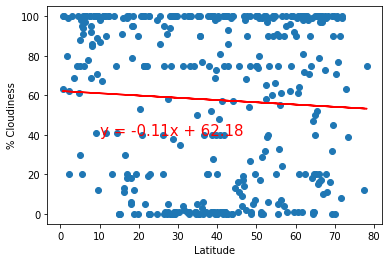

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,40))

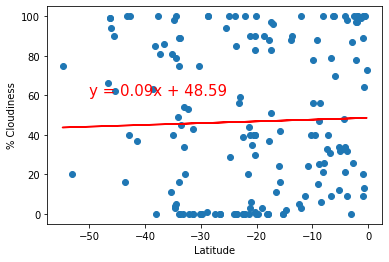

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

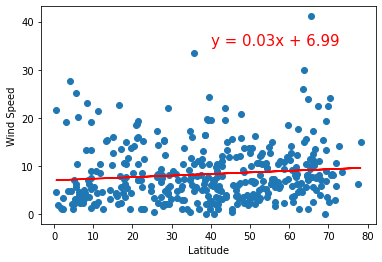

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

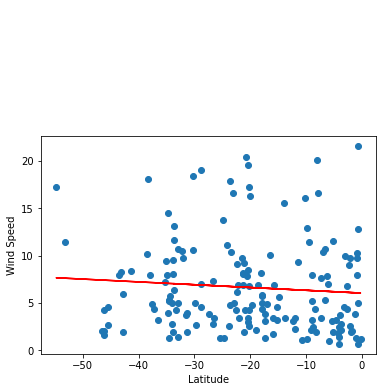

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))